In [27]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Prepare data

In [24]:
df = pd.read_csv("shoe_data.csv")
X_raw, y_raw = df[["Order Date", "Brand", "Sneaker Name", "Release Date", "Shoe Size", "Retail Price", "Buyer Region"]], df["Sale Price"]

enc = OneHotEncoder()

o_date = df["Order Date"].str.split(pat="-", expand=True)
r_date = df["Release Date"].str.split(pat="-", expand=True)
o_date_oh = enc.fit_transform(o_date[[0, 1]]).toarray()
r_date_oh = enc.fit_transform(r_date[[0, 1]]).toarray()

cats = enc.fit_transform(X_raw[["Brand", "Sneaker Name", "Buyer Region"]]).toarray()

scaler = MinMaxScaler()
o_date_scaled = scaler.fit_transform(X=o_date[2].to_numpy().reshape((-1, 1)))
r_date_scaled = scaler.fit_transform(X=r_date[2].to_numpy().reshape((-1, 1)))
data_scaled = scaler.fit_transform(X=df[["Retail Price", "Shoe Size"]])
y = scaler.fit_transform(X=y_raw.to_numpy().reshape((-1, 1)))

X = np.concatenate((o_date_oh, r_date_oh, cats, o_date_scaled, r_date_scaled, data_scaled), axis=1)

print("Shape of inputs:", X.shape)
print("Shape of labels:", y.shape)


Shape of inputs: (99956, 137)
Shape of labels: (99956, 1)


## Split data: train, cross-validation, test data

In [26]:
data = np.concatenate((X, y), axis=1)
np.random.shuffle(data)

X_train = data[:80000, :-1]
X_cv = data[80000:90000, :-1]
X_test = data[90000:, :-1]

y_train = data[:80000, -1]
y_cv = data[80000:90000, -1]
y_test = data[90000:, -1]

print(X_train.shape, X_cv.shape, X_test.shape)
print(y_train.shape, y_cv.shape, y_test.shape)

(80000, 137) (10000, 137) (9956, 137)
(80000,) (10000,) (9956,)


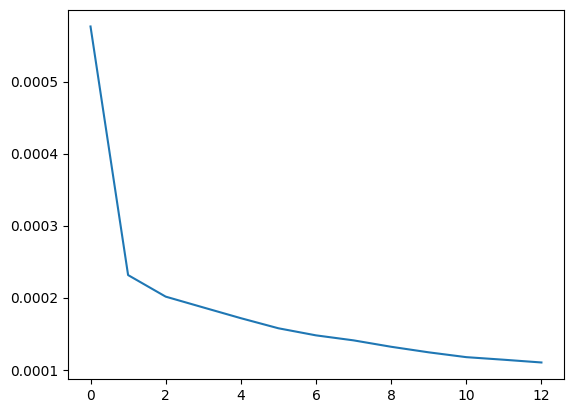

In [31]:
regr = MLPRegressor(hidden_layer_sizes=(100, 100, 64, 32, 8, 4), random_state=1, max_iter=500)
regr.fit(X_train, y_train)
plt.plot(regr.loss_curve_)
plt.show() 

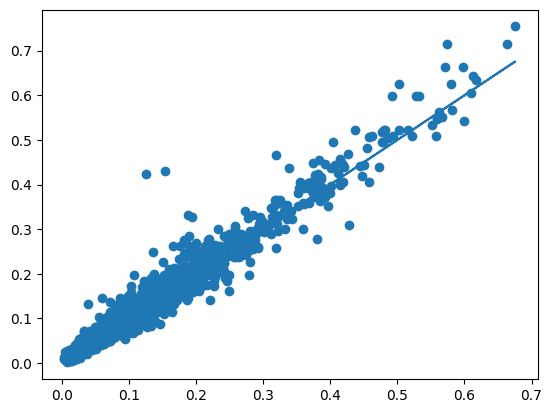

In [35]:
y_hat_cv = regr.predict(X_cv)
plt.scatter(y_hat_cv, y_cv)
plt.plot(y_hat_cv, y_hat_cv)
plt.show()

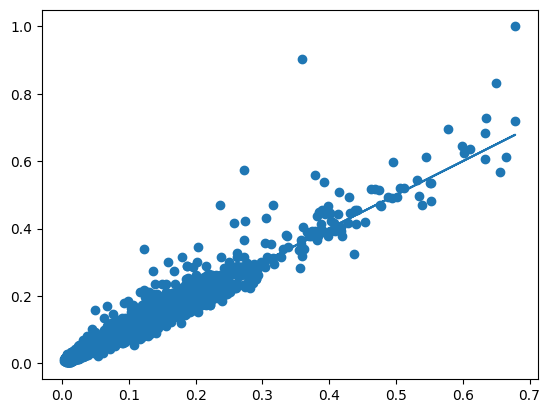

In [34]:
y_hat_cv = regr.predict(X_test)
plt.scatter(y_hat_cv, y_test)
plt.plot(y_hat_cv, y_hat_cv)
plt.show()